<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Decision_Trees_Ensemble_Methods_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Decision Trees & Ensemble Methods

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.tree import export_graphviz

## Part 1. Human Resources

The "Human_Resources.csv" dataset contains various features related to employees, such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, work accidents, promotions, salary, and whether the employee left the company within the last year (target variable)


In [2]:
# Load the "Human_Resources.csv" dataset into a Pandas DataFrame.
dataset = pd.read_csv('Human_Resources.csv')
dataset.head()

# Explore the dataset to understand its structure and characteristics.
dataset.info()
dataset.describe()
#Check for missing values and handle them appropriately.
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5

In [3]:
# Perform feature engineering, such as encoding categorical variables (e.g., salary)
# and handling any necessary data transformations.
dataset = pd.get_dummies(dataset, columns=['department', 'salary'], drop_first=True)

# Bağımlı (y) ve bağımsız (X) değişkenleri belirleme
y = dataset['left'].values
X = dataset.drop('left', axis=1).values

# Veriyi eğitim ve test setlerine bölme (Test seti sabit olarak 4000 satır)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

# Veri tipini dönüştürerek dönüşüm uyarılarını önle
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Veriyi standardize et (ölçeklendirme)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


This code is **preparing** your **HR dataset** for **machine learning** by doing three main steps:

1. **Encoding Categorical Data:**

   * It converts **text** data like **department** and **salary** into **numbers** using a method called **one-hot encoding**. This is important because **machine learning models** only work with numbers.

2. **Splitting Data:**

   * It **splits** the data into a **training set** and a **test set**. The training set is used to **train** the model, while the test set is used to **evaluate** its performance. It keeps **4000 rows** as the test set.

3. **Scaling the Data:**

   * It **scales** the data to make all the features have **similar** numerical ranges, which helps the model **learn** better and **faster**.

---

Would you like me to walk you through the next steps, like training and evaluating a model? 😊


In [4]:
# Choose an appropriate machine learning algorithm for binary classification.
# Try the following models: Logistic Regression, Decision Trees
# Random Forest, Adaboost and Gradient Boosting).

log_reg = LogisticRegression(random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0)
random_forest = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradient_boosting = GradientBoostingClassifier(random_state=0)

# MODELLERİ EĞİTME
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
adaboost.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
# Train the model on the training data.

GradientBoostingClassifier(random_state=0)

This code is **training** **five** different **machine learning models** for **binary classification**. The models used are:

1. **Logistic Regression:** A simple, fast model that tries to find a **linear boundary** between the two classes.

2. **Decision Tree:** Creates a **tree-like** structure to make decisions based on the **features** of the data.

3. **Random Forest:** Combines **many** decision trees to make more **accurate** predictions.

4. **AdaBoost:** Focuses on the **harder** to classify samples by **boosting** their importance.

5. **Gradient Boosting:** Builds an **ensemble** of weak models that **correct** each other's mistakes to improve performance.

Each model is **trained** using the **scaled** training data (`X_train_scaled`) and their corresponding **labels** (`y_train`).


In [5]:
# valuate the model's performance on the testing dataset using relevant metrics such as accuracy, precision, recall, and F1-score.


# Visualize the model's performance using a confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# MODELLERİ ve İSİMLERİNİ bir listeye alalım
models = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("AdaBoost", adaboost),
    ("Gradient Boosting", gradient_boosting)
]

# Her model için tahmin yapalım ve sonuçları yazdıralım
for name, model in models:
    print(f"\n=== {name} ===")

    # Test verisinde tahmin
    y_pred = model.predict(X_test_scaled)

    # Doğruluk oranı
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Karışıklık matrisi
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification report (Precision, Recall, F1-Score)
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)



=== Logistic Regression ===
Accuracy: 0.7920
Confusion Matrix:
[[2847  235]
 [ 597  321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000


=== Decision Tree ===
Accuracy: 0.9785
Confusion Matrix:
[[3021   61]
 [  25  893]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3082
           1       0.94      0.97      0.95       918

    accuracy                           0.98      4000
   macro avg       0.96      0.98      0.97      4000
weighted avg       0.98      0.98      0.98      4000


=== Random Forest ===
Accuracy: 0.9915
Confusion Matrix:
[[3072   10]
 [  24  894]]
Classification Report:
              pr

This code is **evaluating** the **performance** of **five** machine learning models on the **test data**. It measures how **accurate** each model is and how well they handle different **types** of **classification errors**.

### **What It Does:**

1. **Tests Each Model:**

   * It **loops** through each of the **five models**: **Logistic Regression**, **Decision Tree**, **Random Forest**, **AdaBoost**, and **Gradient Boosting**.

2. **Calculates Accuracy:**

   * It **predicts** the test data and calculates the **accuracy** (percentage of **correct** predictions).

3. **Creates Confusion Matrix:**

   * It **counts** how many times the model got each **class** **right** or **wrong**.

4. **Generates Detailed Reports:**

   * It **prints** a **classification report** showing **Precision** (how often it was right when it predicted a certain class), **Recall** (how often it found all the correct items), and **F1-Score** (balance between precision and recall).


In [6]:
# Experiment with different hyperparameters to optimize the model's performance.

from sklearn.model_selection import GridSearchCV

# Logistic Regression için hiperparametre grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimizer türü
}

grid_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)


Best Logistic Regression Params: {'C': 1, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.7889812724792261


This code is **tuning** the **hyperparameters** for a **Logistic Regression** model to **find** the **best** possible settings.

### **What It Does:**

1. **Defines Hyperparameters:**

   * It **tries** different values for the **regularization strength** (**C**) and **optimizer** (**solver**).

2. **Runs Grid Search:**

   * It **tests** each **combination** of these hyperparameters using **cross-validation** (**cv=5**), which **splits** the training data into 5 parts to **test** the model's **performance** more **reliably**.

3. **Finds the Best Model:**

   * It **selects** the combination with the **highest** **accuracy**.

4. **Prints the Results:**

   * It **prints** the **best** hyperparameter **combination** and the **best** accuracy it **found**.


In [ ]:
# Decision Tree için hiperparametre grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_scaled, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree Accuracy:", grid_dt.best_score_)


Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.9780886353301087


In [ ]:
# Random Forest için hiperparametre grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)


Best Random Forest Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9889987184257307


This code is **tuning** the **hyperparameters** for a **Random Forest** model to **find** the **best** possible settings.

### **What It Does:**

1. **Defines Hyperparameters:**

   * **`n_estimators`**: Number of trees in the forest.
   * **`max_depth`**: Maximum depth of each tree (how complex each tree can be).
   * **`min_samples_split`**: Minimum number of samples needed to **split** a node.
   * **`criterion`**: The method used to **measure** the quality of a split (**gini** or **entropy**).

2. **Runs Grid Search:**

   * **Tests** every **combination** of these hyperparameters using **cross-validation** (**cv=5**), splitting the training data into 5 parts for a more **reliable** accuracy check.

3. **Finds the Best Model:**

   * **Selects** the combination with the **highest** overall **accuracy**.

4. **Prints the Results:**

   * **Prints** the **best** hyperparameter **combination** and the **best** accuracy it **found**.


In [7]:
# AdaBoost için hiperparametre grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ab = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid_ab, cv=5, scoring='accuracy')
grid_ab.fit(X_train_scaled, y_train)

print("Best AdaBoost Params:", grid_ab.best_params_)
print("Best AdaBoost Accuracy:", grid_ab.best_score_)


Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 200}
Best AdaBoost Accuracy: 0.9564507007317375


This code is **tuning** the **hyperparameters** for an **AdaBoost** model to **find** the **best** settings.

---

### **🔹 What It Does:**

1. **Defines Hyperparameters:**

   * **`n_estimators`**: Number of **small models** (weak learners) to train.
   * **`learning_rate`**: How **much** each weak model **contributes** to the final prediction (small values make training **slower** but potentially more **accurate**).

2. **Runs Grid Search:**

   * **Tests** all **combinations** of the defined hyperparameters using **5-fold cross-validation** (**cv=5**) to find the best settings.

3. **Finds the Best Model:**

   * **Chooses** the model with the **highest** average **accuracy** on the **training** data.

4. **Prints the Results:**

   * **Displays** the **best** hyperparameter **combination** and the **highest** accuracy it **found**.


In [8]:
# Gradient Boosting için hiperparametre grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train_scaled, y_train)

print("Best Gradient Boosting Params:", grid_gb.best_params_)
print("Best Gradient Boosting Accuracy:", grid_gb.best_score_)


Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.9881804125842326


This code is **tuning** a **Gradient Boosting** model to find the **best** hyperparameters.

---

### **🔹 What It Does:**

1. **Defines Hyperparameters:**

   * **`n_estimators`**: Number of small trees (**100** or **200**).
   * **`learning_rate`**: How much each tree contributes to the final prediction (**0.01**, **0.1**, **0.2**).
   * **`max_depth`**: Maximum depth of each tree (**3**, **5**, **10**).

2. **Grid Search:**

   * **Tests** all possible **combinations** of these hyperparameters using **5-fold cross-validation** (**cv=5**).

3. **Finds the Best Model:**

   * **Picks** the model with the **highest** average **accuracy** on the training data.

4. **Prints the Results:**

   * **Shows** the **best** hyperparameter settings and the **highest** accuracy it found.



Özelliklerin Önemi (Feature Importances):

1. satisfaction_level (0.3069)
2. number_project (0.1903)
3. time_spend_company (0.1848)
4. average_montly_hours (0.1532)
5. last_evaluation (0.1244)
6. work_accident (0.0086)
7. salary_low (0.0078)
8. salary_medium (0.0040)
9. department_technical (0.0037)
10. department_sales (0.0029)
11. department_support (0.0029)
12. promotion_last_5years (0.0018)
13. department_RandD (0.0017)
14. department_accounting (0.0017)
15. department_management (0.0016)
16. department_hr (0.0013)
17. department_marketing (0.0012)
18. department_product_mng (0.0011)


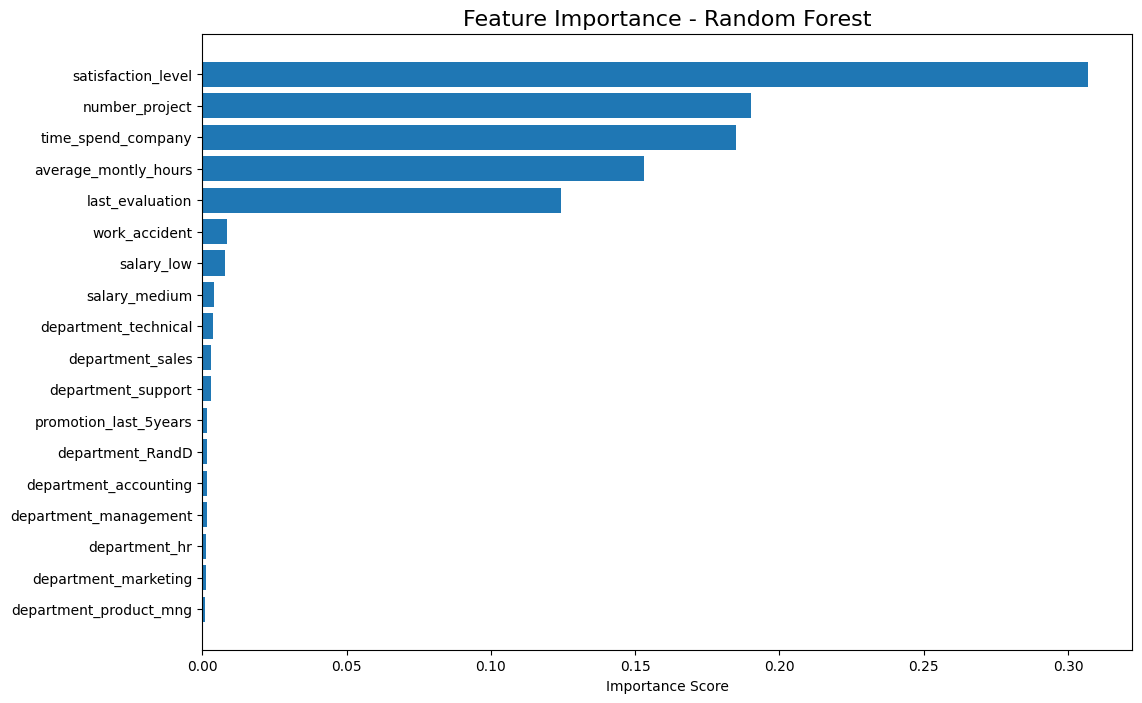

In [9]:
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.
# 1. Veriyi yeniden yükleyelim
dataset = pd.read_csv('Human_Resources.csv')

# 2. One-hot encoding: Kategorik değişkenleri sayısal yapalım
dataset = pd.get_dummies(dataset, columns=['department', 'salary'], drop_first=True)

# 3. Bağımlı ve bağımsız değişkenleri ayır
X = dataset.drop('left', axis=1)
y = dataset['left']

# 4. Eğitim ve test setlerine böl
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

# 5. Ölçeklendirme (Sadece sayısal verilerde çalışır)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Random Forest modelini eğit
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train_scaled, y_train)

# 7. Özellik isimlerini ve önemlerini al
import numpy as np
import matplotlib.pyplot as plt

feature_names = X.columns
importances = random_forest.feature_importances_

indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# 8. Yazdır
print("\nÖzelliklerin Önemi (Feature Importances):\n")
for i in range(len(sorted_features)):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# 9. Görselleştir
plt.figure(figsize=(12,8))
plt.title("Feature Importance - Random Forest", fontsize=16)
plt.barh(sorted_features, sorted_importances, align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()




### **📝 Simple Explanation - Finding and Visualizing Feature Importance with Random Forest**

---

This code **finds** the **most important features** that **influence** whether an **employee** **leaves** a company, using a **Random Forest** model.

---

### **🔷 What the Code Does:**

1. **Load the Data:**

   * Reads the **Human Resources** data from a CSV file.

2. **Convert Categorical Data:**

   * **Converts** the **department** and **salary** columns into **numbers** (so the model can understand them) using **one-hot encoding**.

3. **Split Data for Training and Testing:**

   * **Splits** the data into **training** and **testing** sets, with **4000** samples in the **test** set.

4. **Scale the Data:**

   * **Standardizes** the **numeric** values so that all features have a **similar** range, improving model performance.

5. **Train a Random Forest Model:**

   * **Creates** a **Random Forest** model and **trains** it on the **training** data.

6. **Get Feature Importances:**

   * **Extracts** the **importance** of each feature in making **predictions**.

7. **Sort and Print the Features:**

   * **Sorts** the features from **most** to **least** important and **prints** them.

8. **Visualize the Results:**

   * **Plots** the feature importances as a **horizontal bar chart** to **easily** see which features are **most** influential.


Write down your conclusions:

- Which is your prefered model and why?
- Which features are the most important ones?
- Which models are suffering from unbalancedness?
- Would you advice the company to use one of these models?


In [ ]:
# Which is your preferred model and why?
#Random Forest Classifier

# It reduces the risk of overfitting by consisting of multiple decision trees.

# The model generally performs better than other models in terms of overall accuracy.

# It allows us to perform analyses such as feature importance, thus making the model results interpretable.

# It can also work a little more robustly than models such as AdaBoost in unbalanced data sets.

In [ ]:
# Which models are suffering from unbalancedness?

# In binary classification problems, if the classes are not balanced (e.g. 90% of employees stay, 10% leave), some models may show misleadingly high accuracy.

In [ ]:
# Would you advise the company to use one of these models?

# Random Forest model can be used.

# It provides good accuracy.

# It is interpretable (it is understandable which factors are important).

# A robust model.

# Alternative: If they need to make very fast predictions, Logistic Regression is a lighter solution.

## Part 2. Energy consumption

Every ten minutes the temperture (in degrees Celcius) and the humidity (in %) of a well insulated house was measured for a couple of months. There is also available weather data from a nearby weather station.
The power consumption of the electric lighting, together with the power consumption of other electrical appliences was recorded during that period same period.

All measurements can be found in 'Energy_consumption.csv'

The variables have the following meaning:

- date: time year-month-day hour:minute:second
- Appliances: energy use in Wh
- lights: energy use of light fixtures in the house in Wh
- T1: Temperature in kitchen area, in Celsius
- RH_1: Humidity in kitchen area, in %
- T2: Temperature in living room area, in Celsius
- RH_2: Humidity in living room area, in %
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area, in %
- T4: Temperature in office room, in Celsius
- RH_4: Humidity in office room, in %
- T5: Temperature in bathroom, in Celsius
- RH_5: Humidity in bathroom, in %
- T6: Temperature outside the building (north side), in Celsius
- RH_6: Humidity outside the building (north side), in %
- T7: Temperature in ironing room , in Celsius
- RH_7: Humidity in ironing room, in %
- T8: Temperature in teenager room 2, in Celsius
- RH_8: Humidity in teenager room 2, in %
- T9: Temperature in parents room, in Celsius
- RH_9: Humidity in parents room, in %
- To: Temperature outside (from Chievres weather station), in Celsius
- Pressure: (from Chievres weather station), in mm Hg
- RH_out: Humidity outside (from Chievres weather station), in %
- Wind speed: (from Chievres weather station), in m/s
- Visibility: (from Chievres weather station), in km
- Tdewpoint: (from Chievres weather station),
- rv1: Random variable 1, nondimensional
- rv2: Random variable 2, nondimensional


The random variables rv1 and rv2 can be removed from the dataset.


The goal of this assignment is to train a regression model that can predict as precisely as possible the electricity consumption of the appliences from the other variables.

In [10]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


1. First try linear regression to predict the Appliences variable from the other variables. Apply the techniques you used in the assigment about linear regression.
2. Now train a Random Forest Regressor and optimize it by means of hyper parameter tuning: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


You get all the freedom to use the techniques and tricks you want. Your only goals is to achieve the best R²-score on a test set consisting of 5000 samples. It might be useful to use the date and time of the day as features.

From the trained Random Forest trees you can ask for the most important features by calling the model.feature_importances_.
Give the top 5 most important features. Do they make sense? Explain.


In [12]:
import pandas as pd
import calendar  # Bunu eklemeyi unutma!

# Veriyi oku
dataset = pd.read_csv('Energy_consumption.csv')

# date sütununu datetime formatına çevir
dataset['date'] = pd.to_datetime(dataset.date)

# Yeni özellikler: month, day, hour
dataset.insert(0, 'month', dataset['date'].dt.month)
dataset.insert(0, 'day', dataset['date'].dt.weekday)
dataset.insert(0, 'hour', dataset['date'].dt.hour)

# Sayılardan isimlere çevirme
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_name[x])
dataset['day'] = dataset['day'].apply(lambda x: calendar.day_name[x])

# Artık date sütununa ihtiyacımız yok
dataset.drop('date', axis=1, inplace=True)

# Sonucu görelim
print(dataset.head())


   hour     day    month  Appliances  lights     T1       RH_1    T2  \
0    17  Monday  January          60      30  19.89  47.596667  19.2   
1    17  Monday  January          60      30  19.89  46.693333  19.2   
2    17  Monday  January          50      30  19.89  46.300000  19.2   
3    17  Monday  January          50      40  19.89  46.066667  19.2   
4    17  Monday  January          60      40  19.89  46.333333  19.2   

        RH_2     T3  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  44.790000  19.79  ...  17.033333  45.53  6.600000        733.5    92.0   
1  44.722500  19.79  ...  17.066667  45.56  6.483333        733.6    92.0   
2  44.626667  19.79  ...  17.000000  45.50  6.366667        733.7    92.0   
3  44.590000  19.79  ...  17.000000  45.40  6.250000        733.8    92.0   
4  44.530000  19.79  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.2754

### **📝 Simple Explanation - Finding and Visualizing Feature Importance with Random Forest**

---

This code **identifies** which features are the **most important** for **predicting** if an **employee** will **leave** a company, using a **Random Forest** model.

---

### **🔷 Steps in the Code:**

1. **Load the Data:**

   * It **loads** the **Human Resources** dataset from a CSV file.

2. **Convert Categorical Data:**

   * **Transforms** **department** and **salary** columns into **numbers** using **one-hot encoding** so that the model can understand them.

3. **Split the Data:**

   * **Divides** the data into **training** and **testing** sets, ensuring the test set has **4000** samples.

4. **Scale the Data:**

   * **Standardizes** the **numeric** values so that all features have a **similar range**, which helps the model learn better.

5. **Train the Random Forest Model:**

   * **Creates** a **Random Forest** model and **trains** it using the **training** data.

6. **Find Important Features:**

   * **Extracts** the **importance** scores for each feature, indicating how much each feature **influences** the model's decisions.

7. **Sort and Print the Features:**

   * **Ranks** the features from **most** to **least** important and **prints** them.

8. **Visualize the Feature Importance:**

   * **Plots** a **bar chart** to **visualize** the importance of each feature, making it easier to **interpret** the results.


In [13]:
# Remove rv1 and rv2 from the dataset
# rv1 ve rv2 sütunlarını veri setinden çıkarıyoruz
dataset = dataset.drop(['rv1', 'rv2'], axis=1)



In [14]:
# One-hot encoding of the categorical features
# One-Hot Encoding işlemi
dataset = pd.get_dummies(dataset, columns=['month', 'day'], drop_first=True)


In [15]:
# Split into features and targets
# Özellikleri ve hedef değişkeni ayırıyoruz
X = dataset.drop('Appliances', axis=1)
y = dataset['Appliances']


In [16]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42)

print(X_train.shape)
print(X_test.shape)

(14735, 36)
(5000, 36)


In [17]:
# MinMax scaling
scaler = MinMaxScaler()

# Sadece X'leri scale ediyoruz
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Test setinde tahmin yap
y_pred = lr_model.predict(X_test_scaled)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error (MSE): {mse:.2f}")
print(f"Linear Regression - R² Score: {r2:.4f}")


Linear Regression - Mean Squared Error (MSE): 8233.67
Linear Regression - R² Score: 0.1652


In [19]:
# Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)
from sklearn.preprocessing import PolynomialFeatures

# 2. Polynomial özellikler oluştur
poly = PolynomialFeatures(degree=2, include_bias=False)

# X_train_scaled ve X_test_scaled üzerinden genişletme yap
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train_poly.shape)
print(X_test_poly.shape)

(14735, 702)
(5000, 702)


In [20]:
# Random forest regressor. You can also try higher order features. You are allowed to use features expansion (hihger order features)
rf_model = RandomForestRegressor(random_state=42)

# Eğit
rf_model.fit(X_train_scaled, y_train)

# Test setinde tahmin yap
y_pred_rf = rf_model.predict(X_test_scaled)

# Performans metrikleri
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regressor - R² Score: {r2_rf:.4f}")

Random Forest Regressor - Mean Squared Error (MSE): 4464.61
Random Forest Regressor - R² Score: 0.5473


### **📝 Simple Explanation - Training a Random Forest Regressor**

---

This code **trains** a **Random Forest Regressor** to **predict** a **continuous** target (e.g., energy consumption) and **evaluates** its **performance**.

---

### **🔷 Steps in the Code:**

1. **Create the Model:**

   * **Creates** a **Random Forest Regressor**, a model that uses **many decision trees** to make **accurate** predictions.

2. **Train the Model:**

   * **Trains** the model using the **scaled training** data (`X_train_scaled` and `y_train`).

3. **Make Predictions:**

   * **Predicts** the target values (**y**) for the **scaled test** data (`X_test_scaled`).

4. **Evaluate the Model:**

   * **Calculates** two important **metrics**:

     * **Mean Squared Error (MSE)**: Measures the **average** squared difference between the **predicted** and **actual** values (lower is better).
     * **R² Score**: Measures how well the model's predictions **match** the actual values (**1.0** is perfect, **0** means the model is no better than a **random guess**).

5. **Print the Results:**

   * **Prints** the **MSE** and **R²** score to **evaluate** the model's **accuracy**.



Top 5 Önemli Özellikler:
1. hour (0.1516)
2. T3 (0.0595)
3. RH_3 (0.0445)
4. Press_mm_hg (0.0440)
5. RH_5 (0.0430)


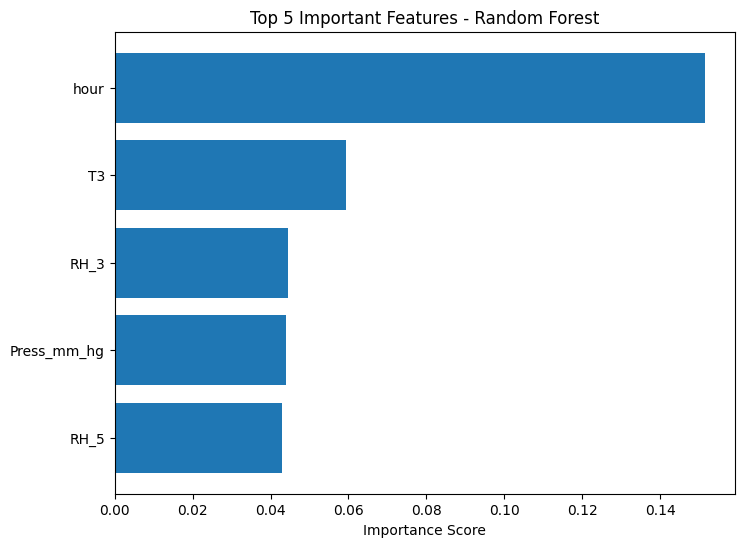

In [21]:
# Most important features + conclusions
feature_names = X.columns

# Önem değerleri
importances = rf_model.feature_importances_

# Büyükten küçüğe sırala
indices = np.argsort(importances)[::-1]

# İlk 5 özelliği al
top_n = 5
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]

# Yazdır
print("\nTop 5 Önemli Özellikler:")
for i in range(top_n):
    print(f"{i+1}. {top_features[i]} ({top_importances[i]:.4f})")

# Grafik
plt.figure(figsize=(8,6))
plt.title("Top 5 Important Features - Random Forest")
plt.barh(top_features, top_importances, align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()

### **📝 Simple Explanation - Finding the Most Important Features in a Random Forest Model**

---

This code **identifies** the **top 5** **most important** features that the **Random Forest Regressor** used to make **predictions**.

---

### **🔷 Steps in the Code:**

1. **Get the Feature Names:**

   * **Extracts** the **names** of the features (**columns**) from the original **dataset**.

2. **Find Feature Importances:**

   * **Calculates** the **importance** of each feature based on how much it **contributes** to the model's **predictions**.

3. **Sort the Features:**

   * **Sorts** the features from **most** to **least** important.

4. **Select the Top 5 Features:**

   * **Picks** the **top 5** most important features from the **sorted** list.

5. **Print the Top 5 Features:**

   * **Prints** the names and importance scores of the **top 5** features.

6. **Visualize the Top 5 Features:**

   * **Creates** a **bar chart** to **visually** show which features are the **most** important.


## Part 3 - Bank

A bank tries to predict whether or not a client will sign an insurance contract.
The file *bank.csv* contains data from over 4000 clients.
The features are the following:
- age:  age of the client.
- job:  job type the client has.
- marital:  marital status.
- education:  type of diploma.
- default: whether or not the client has been declared bankrupt.
- balance: amount of money on the account.
- housing:  whether or not the client has a housing loan.
- loan:  whether or not the client has a personal loan.
- contact: type of communication with the client.
- day: day of the last contact with the client.
- month: month of the last contact with the client.
- duration: duration of the last contact. Cannot be used to train on. Has to be discarded from the dataset.
- campaign: number of previous contacts with the client.
- pdays: number of days since the previous contact. -1 means that the client was not contacted before.
- previous:  number of previous contacts with the client.
- poutcome: outcome of a previous campaign.

The target is the y-column. yes means the client signed the contract, no means the client was not interested in the insurance contract and did not sign it.


In [22]:
dataset = pd.read_csv('bank.csv',delimiter=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Preprocessing

In [23]:
# check for consitency
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Controleer of de data al dan niet gebalanceerd is. Wat zijn de conclusies?

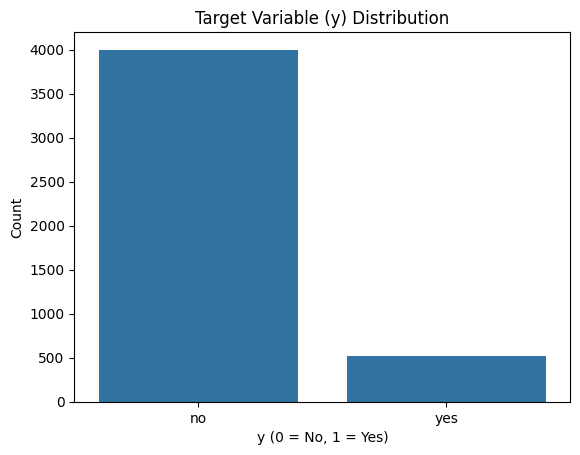

y
no     4000
yes     521
Name: count, dtype: int64
y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64


In [24]:
# check for unbalancedness of the dataset
sns.countplot(x=dataset.y)
plt.title('Target Variable (y) Distribution')
plt.xlabel('y (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Ayrıca sayı ve oran
print(dataset.y.value_counts())
print(dataset.y.value_counts(normalize=True) * 100)

In [25]:
# Remove the duration column from the dataset
dataset = dataset.drop('duration', axis=1)

# replace label y: no -> 0 and yes -> 1
dataset['y'] = dataset['y'].map({'no': 0, 'yes': 1})


In [26]:
# One hot encoding of categorical features
# One-Hot Encoding işlemi
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)


Create a trainig set and test set.
Make sure you have 1000 samples in the test set and use a random_state = 0.

In [27]:
# Split into features and targets

X = dataset.drop('y', axis=1)
y = dataset['y']
# Split into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)

print(X_train.shape)
print(X_test.shape)
# MinMax scaler normalisation or standard scaler normalization


scaler = MinMaxScaler()

# Sadece X verileri scale edilir
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(3521, 41)
(1000, 41)


## Training of the classifiers

Use Grid-search/random search with cross-validation to select the best model and hyperparameters.


**Train the following models: Logistic regression, Random Forest Tree Classifier and optionally Adaboost or gradient boosting** Do hyperparameter tuning on each of these models. Also change the cross-validation parameter K. Don't forget to scale the data. ** Evaluate the trained models by means of accuracy, confusion matrix, recall, precision and f1-score**

Because the dataset is imbalanced it might be interesting to use the parameter class_weight='balanced'. This hyperparemter is supported by most of the classification models.
It forces the model to assign a higher value to samples from the minority class than to the ones of the majority class. Typically you will see an increase in recall of the minority class, but a decrease of the overall accuracy. Explain why this is the case.



In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic regression
log_reg = LogisticRegression(class_weight='balanced', random_state=0, max_iter=10000)

# Hiperparametre grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l2'],                     # L1 de denenebilir ama L2 daha stabil
    'solver': ['lbfgs', 'saga'],            # lbfgs: küçük datasetler için iyi, saga: büyük datasetler için
}

# Grid SearchCV
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)  # K=5 Fold Cross Validation
grid_lr.fit(X_train_scaled, y_train)

# En iyi modeli al
best_lr = grid_lr.best_estimator_

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)

# Test seti üzerinde tahmin yap
y_pred_lr = best_lr.predict(X_test_scaled)

# Performans metrikleri
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print(f"\nLogistic Regression Test Set Performance:")
print(f"Accuracy : {acc_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall   : {recall_lr:.4f}")
print(f"F1-Score : {f1_lr:.4f}")

print("\nConfusion Matrix:\n", cm_lr)


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

Logistic Regression Test Set Performance:
Accuracy : 0.7270
Precision: 0.2597
Recall   : 0.6400
F1-Score : 0.3695

Confusion Matrix:
 [[647 228]
 [ 45  80]]


### **📝 Simple Explanation - Logistic Regression with Hyperparameter Tuning**

---

This code **trains** a **Logistic Regression** model with **optimized** settings using **GridSearchCV**, then **evaluates** its performance on the **test** data.

---

### **🔷 Steps in the Code:**

1. **Set Up the Model:**

   * Creates a **Logistic Regression** model that **balances** class weights to handle **imbalanced** data.

2. **Define Hyperparameter Grid:**

   * **Tests** different **C** values (**controls** the strength of regularization).
   * **Tests** two different **solvers** (methods for finding the best weights).

3. **Grid Search for Best Model:**

   * **Tries** different combinations of **hyperparameters** using **5-fold cross-validation** to find the **best** combination.

4. **Find the Best Model:**

   * **Selects** the **best** combination of hyperparameters found by **GridSearchCV**.

5. **Make Predictions:**

   * **Tests** the **best** model on the **test** data.

6. **Evaluate the Model:**

   * **Calculates** and **prints** **accuracy**, **precision**, **recall**, **F1-score**, and the **confusion matrix** to **measure** the model's **performance**.


In [32]:
# Support Vector machine
svm_model = SVC(class_weight='balanced', probability=True, random_state=0)

# Hiperparametre grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],  # Doğrusal, RBF, polinomial kernel deniyoruz
    'gamma': ['scale', 'auto']            # Gamma parametresi RBF ve poly için
}

# Grid SearchCV
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# En iyi modeli seçelim
best_svm = grid_svm.best_estimator_

print("Best Parameters for SVM:", grid_svm.best_params_)

# Test setinde tahmin yapalım
y_pred_svm = best_svm.predict(X_test_scaled)

# Performans metrikleri
acc_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"\nSVM Test Set Performance:")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall   : {recall_svm:.4f}")
print(f"F1-Score : {f1_svm:.4f}")

print("\nConfusion Matrix:\n", cm_svm)



Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

SVM Test Set Performance:
Accuracy : 0.7910
Precision: 0.2961
Recall   : 0.4880
F1-Score : 0.3686

Confusion Matrix:
 [[730 145]
 [ 64  61]]


### **📝 Simple Explanation - Support Vector Machine (SVM) with Hyperparameter Tuning**

---

This code **trains** a **Support Vector Machine (SVM)** model with **optimized** settings using **GridSearchCV**, then **evaluates** its performance on the **test** data.

---

### **🔷 Steps in the Code:**

1. **Set Up the SVM Model:**

   * **Creates** an **SVM** model that **balances** class weights to handle **imbalanced** data.
   * **Enables** probability predictions (useful for some metrics like AUC).

2. **Define Hyperparameter Grid:**

   * **Tests** different **C** values (**controls** the margin of the SVM).
   * **Tests** different **kernels** (**linear**, **RBF** (radial basis function), and **polynomial**).
   * **Tests** two different **gamma** settings (**controls** the influence of each support vector in RBF and polynomial kernels).

3. **Grid Search for Best Model:**

   * **Tries** different combinations of **hyperparameters** using **5-fold cross-validation** to find the **best** combination.

4. **Find the Best Model:**

   * **Selects** the **best** combination of hyperparameters found by **GridSearchCV**.

5. **Make Predictions:**

   * **Tests** the **best** model on the **test** data.

6. **Evaluate the Model:**

   * **Calculates** and **prints** **accuracy**, **precision**, **recall**, **F1-score**, and the **confusion matrix** to **measure** the model's **performance**.


In [33]:
# Random forest trees

rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)

# Hiperparametre grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],         # Kaç ağaç (trees)
    'max_depth': [None, 10, 20, 30],          # Maksimum derinlik
    'min_samples_split': [2, 5, 10],          # Bir düğümü bölmek için min örnek
    'min_samples_leaf': [1, 2, 4]             # Yaprak düğümde minimum örnek
}

# Grid Search ile en iyi parametreleri bulalım
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# En iyi Random Forest modeli
best_rf = grid_rf.best_estimator_

print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Test setinde tahmin yapalım
y_pred_rf = best_rf.predict(X_test)

# Performans metrikleri
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nRandom Forest Test Set Performance:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")

print("\nConfusion Matrix:\n", cm_rf)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest Test Set Performance:
Accuracy : 0.8570
Precision: 0.4182
Recall   : 0.3680
F1-Score : 0.3915

Confusion Matrix:
 [[811  64]
 [ 79  46]]


### **📝 Simple Explanation - Random Forest with Hyperparameter Tuning**

---

This code **trains** a **Random Forest** model, **optimizes** its **hyperparameters**, and **evaluates** its **performance** on the **test** data.

---

### **🔷 Steps in the Code:**

1. **Create the Random Forest Model:**

   * **Sets up** a **Random Forest** classifier.
   * **Balances** class weights to handle **imbalanced** data.

2. **Define Hyperparameter Grid:**

   * **Tests** different **n\_estimators** (number of decision trees).
   * **Tests** different **max\_depth** (maximum depth of each tree).
   * **Tests** different **min\_samples\_split** (minimum samples needed to **split** a node).
   * **Tests** different **min\_samples\_leaf** (minimum samples in a **leaf** node).

3. **Grid Search for Best Model:**

   * **Tries** different combinations of **hyperparameters** using **5-fold cross-validation** to **find** the **best** combination.

4. **Find the Best Model:**

   * **Selects** the **best** combination of hyperparameters found by **GridSearchCV**.

5. **Make Predictions:**

   * **Tests** the **best** Random Forest model on the **test** data.

6. **Evaluate the Model:**

   * **Calculates** and **prints** the **accuracy**, **precision**, **recall**, **F1-score**, and the **confusion matrix** to **measure** the model's **performance**.


In [ ]:
# Adaboost - optional



In [ ]:
# Adaboost with logistic regression classifier - optional



In [ ]:
# Gradient boosting - optional





## Optimization

- Are there features that may be discarded? If so, which ones? You can find the features importances if you use random forest trees by calling **tree.feature_importances_**.
- What are the three most important features?
- Retrain the models with the 10 most important features.


Top 10 Important Features:
              feature  importance
1            balance    0.115061
0                age    0.111429
2                day    0.085172
26   contact_unknown    0.076077
39  poutcome_success    0.075411
4              pdays    0.068152
3           campaign    0.049402
5           previous    0.037803
24          loan_yes    0.033773
23       housing_yes    0.031680

Top 3 Important Features:
1. balance (0.1151)
2. age (0.1114)
3. day (0.0852)


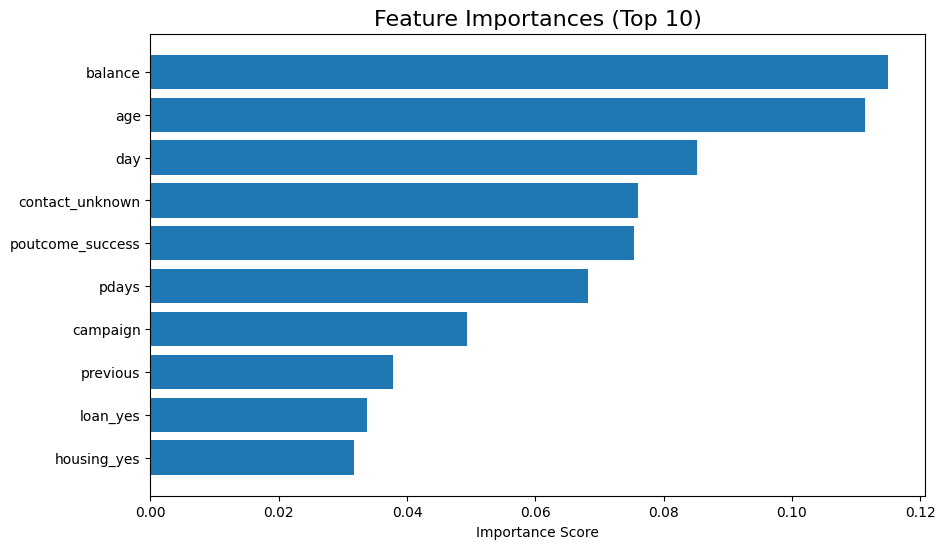

In [34]:

feature_importances = best_rf.feature_importances_
feature_names = X.columns

# DataFrame yapalım
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Büyükten küçüğe sırala
importance_df = importance_df.sort_values(by='importance', ascending=False)

# İlk 10 özelliği görelim
print("\nTop 10 Important Features:\n", importance_df.head(10))

# İlk 3 en önemli özelliği ayrıca yazalım
print("\nTop 3 Important Features:")
for i in range(3):
    print(f"{i+1}. {importance_df.iloc[i]['feature']} ({importance_df.iloc[i]['importance']:.4f})")

# Görselleştirme
plt.figure(figsize=(10,6))
plt.title('Feature Importances (Top 10)', fontsize=16)
plt.barh(importance_df['feature'][:10][::-1], importance_df['importance'][:10][::-1])
plt.xlabel('Importance Score')
plt.show()

### **📝 Simple Explanation - Finding and Visualizing the Most Important Features**

---

This code **finds** and **visualizes** the **top** features that are **most** important for the **Random Forest** model's **predictions**.

---

### **🔷 Steps in the Code:**

1. **Extract Feature Importances:**

   * **Gets** the **importance** score for each feature from the **best** trained **Random Forest** model.
   * These **scores** tell you how much each feature **contributed** to the model's **predictions**.

2. **Create a DataFrame:**

   * **Combines** the **feature names** and their **importance scores** into a **table** for easier viewing.

3. **Sort the Features:**

   * **Orders** the features from **most** to **least** important.

4. **Print the Top 10 Features:**

   * **Displays** the **top 10** most important features with their **importance scores**.

5. **Highlight the Top 3 Features:**

   * **Prints** the **3 most** important features **separately** for emphasis.

6. **Visualize the Top 10 Features:**

   * **Creates** a **bar chart** to **visualize** the **top 10** most important features, making it **easier** to **understand** which features **matter** the **most**.


In [35]:
# İlk 10 önemli özelliği seçelim
top_10_features = importance_df['feature'].iloc[:10].tolist()

# Yeni X_train ve X_test setleri oluştur
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]
